<a href="https://colab.research.google.com/github/inefable12/CQCPE_2023_jesus/blob/main/3_Estereoisomeria_SMILES_extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 24.4 MB/s eta 0:00:00


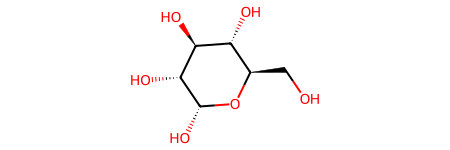

In [2]:
# Estereoisómeros de la alpha-D-glucose

from rdkit.Chem import MolFromSmiles

alpha_d_glucose = 'O[C@@H]1[C@H](O)[C@@H](O)[C@H](O)[C@@H](CO)O1'

MolFromSmiles(alpha_d_glucose)

In [3]:
from itertools import product, zip_longest

def all_stereoisomers(smiles):
    '''Given an SMILES string, return list of SMILES string of all stereoisomers'''
    # convert smiles to a list of substrings separated by occurance of stereogenic centers
    split_smiles = [frag for frag in smiles.split('@') if frag != '']
    num_stereogenic_centers = len(split_smiles) - 1
    # obtain all combinations of configurations
    configurations = product(['@@', '@'], repeat = num_stereogenic_centers)
    # for each combinations of configurations, write the SMILES of the stereoisomer
    isomers = []
    for config in configurations:
        stereoisomer = ''
        for frag_config in zip_longest(split_smiles, config, fillvalue=''):
            stereoisomer += ''.join(frag_config)
        isomers.append(stereoisomer)
    return isomers

hexose_isomers = all_stereoisomers(alpha_d_glucose)
len(hexose_isomers)

32

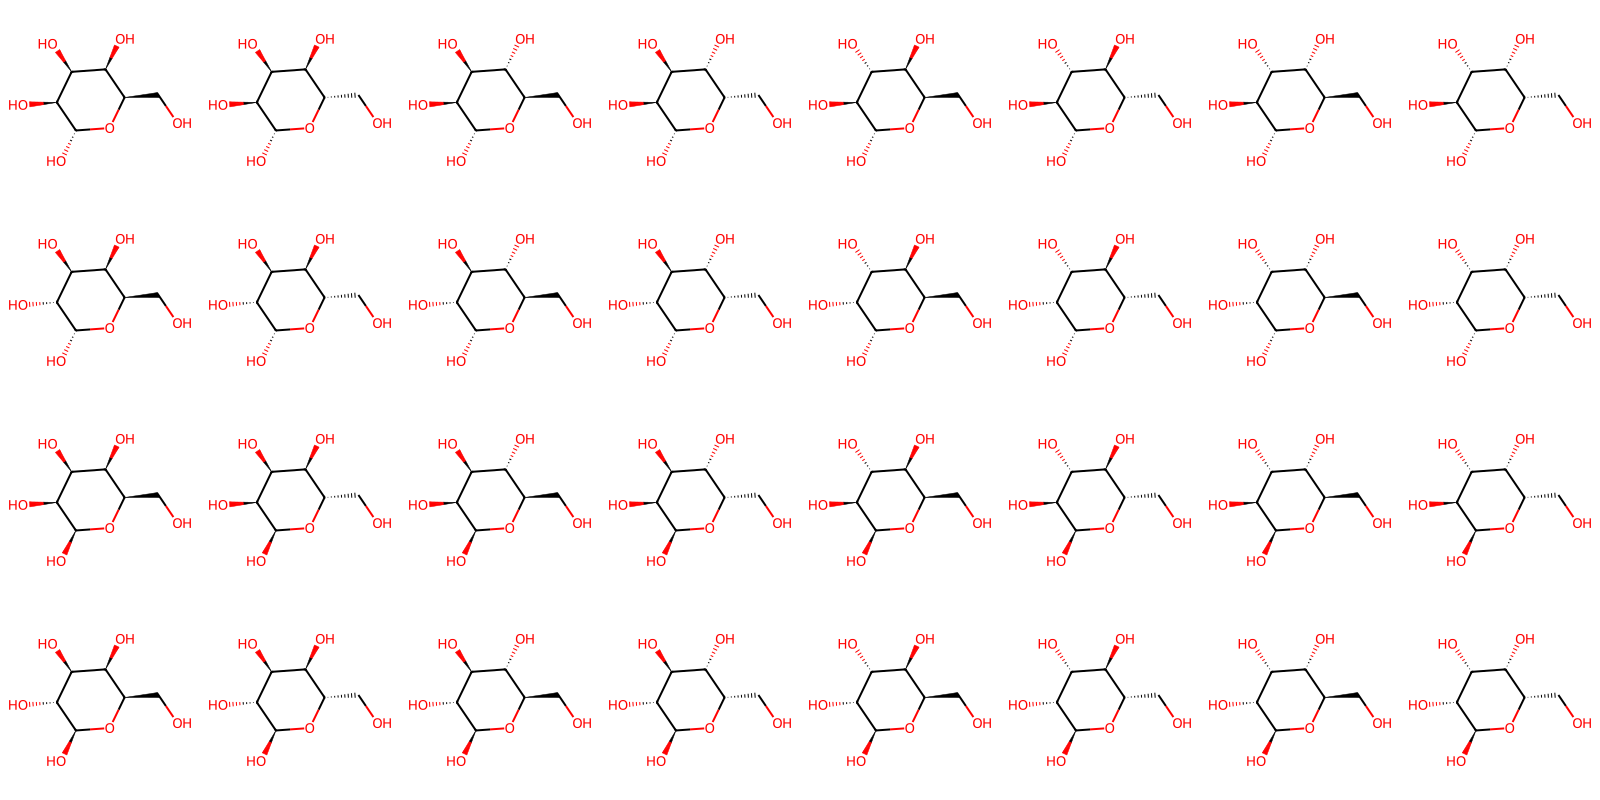

In [4]:
from rdkit.Chem.Draw import MolsToGridImage

mols = [MolFromSmiles(smiles) for smiles in hexose_isomers]
MolsToGridImage(mols, molsPerRow = 8)

Another excellent characteristic of Python is that the syntex is readable and concise. Take for an example, identifying all stereoisomers of alpha-D-glucose. The segment formula can be drawn from its SMILES representation using a function from the package, RDKit. S and R configurations of the stereogenic centers are communicated by @ and @@, respectively.

The operation can be implemented in only twelve lines of code. We define the opeartion inside a Python function, titled all_stereoisomers. A smiles is passed as an argument. etc.

When visualized, we observe the expected 32 stereoisomers.

# Learning to Code as an Experimental Chemist

- Coding is another tool
- Enforce findings through theoretical calculations
- Target and expedite investigation
- Codify and automate analysis